At this point, you have obtained the data set for your Capstone project, cleaned and wrangled it into a form that's ready for analysis. It's now time to apply the inferential statistics techniques you have learned to explore the data. For example, are there variables that are particularly significant in terms of explaining the answer to your project question? Are there strong correlations between pairs of independent variables, or between an independent and a dependent variable? 

Submission: Write a short report (1-2 pages) on the inferential statistics steps you performed and your findings. Check this report into your github and submit a link to it. Eventually, this report can be incorporated into your Milestone report.

In [1]:
# import libraries and connect to database
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
con = sqlite3.connect("data/citibike_database.db3")

### It appears that rides on weekends have a larger mean duration than rides during the week. Test if this is statistically significant:
- T-test indicates that there is a statistically significant difference in the average trip duration between weekdays and weekends.

In [2]:
# get average duration of rides for all weekdays in 2014
query = "SELECT yday,wkday, AVG(tripduration) as dur_avg FROM rides WHERE year=2014 AND wkday<5 GROUP BY yday"
df1 = pd.read_sql_query(query,con)
df1.head()

,yday,wkday,dur_avg
0,1,2,922.646641
1,2,3,778.819651
2,3,4,803.332168
3,6,0,768.304416
4,7,1,726.101324


/Users/Andy/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


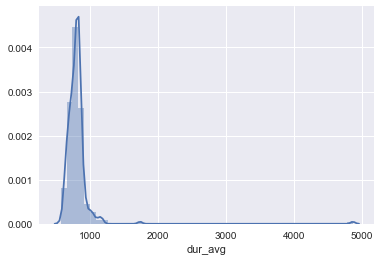

In [3]:
sns.distplot(df1.dur_avg);

In [4]:
# get average duration of rides for all weekend days in 2014
query = "SELECT yday,wkday, AVG(tripduration) as dur_avg FROM rides WHERE year=2014 AND wkday>4 GROUP BY yday"
df2 = pd.read_sql_query(query,con)
df2.head()

,yday,wkday,dur_avg
0,4,5,1223.894852
1,5,6,824.238237
2,11,5,742.173489
3,12,6,724.184099
4,18,5,845.045984


/Users/Andy/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


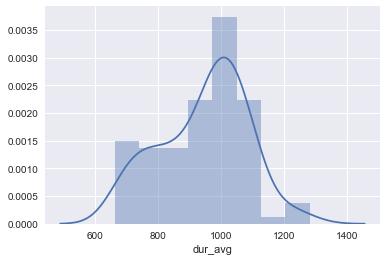

In [5]:
sns.distplot(df2.dur_avg);

In [6]:
import scipy.stats as stats
print(df1.dur_avg.mean(), df2.dur_avg.mean())

810.6207456501187 944.334449343228


In [7]:
stats.ttest_ind(df1.dur_avg, df2.dur_avg ,equal_var=False)

Ttest_indResult(statistic=-6.1237335087239853, pvalue=2.4882379828364517e-09)

### Number of rides vs Temperature: Compute correlation and p-value
- The pearson r value is 0.84, with a very small p-value, indicating that the daily number of rides is highly correlated with daily temperature.

In [8]:
# Get total number rides per day

query = "SELECT yday,count(*) as N FROM rides WHERE year=2014 GROUP BY yday"
df = pd.read_sql_query(query,con)
df.head()

,yday,N
0,1,6059
1,2,8600
2,3,1144
3,4,2292
4,5,2678


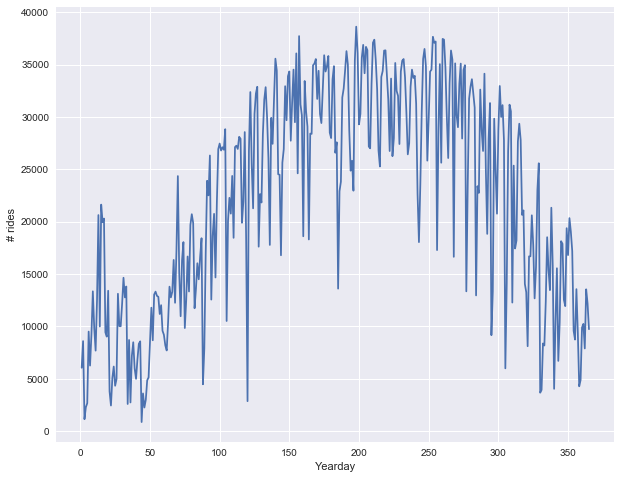

In [9]:
plt.figure(figsize=(10,8))
plt.plot(df.yday,df.N);
plt.xlabel('Yearday')
plt.ylabel('# rides')

In [10]:
# Get daily temperature
con2 = sqlite3.connect("data/nyc_weather.db3")
df2 = pd.read_sql_query("SELECT yday,Mean_TemperatureF as Tmean, Max_TemperatureF as Tmax, Min_TemperatureF as Tmin from temps where year=2014",con2)
df2.head()

,yday,Tmean,Tmax,Tmin
0,1,29,33,25
1,2,25,32,18
2,3,15,19,10
3,4,19,28,9
4,5,38,50,25


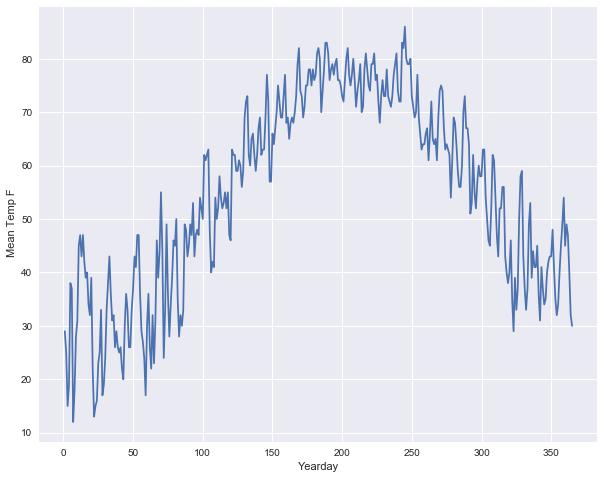

In [11]:
plt.figure(figsize=(10,8))
plt.plot(df2.yday,df2.Tmean)
plt.xlabel('Yearday')
plt.ylabel(' Mean Temp F');

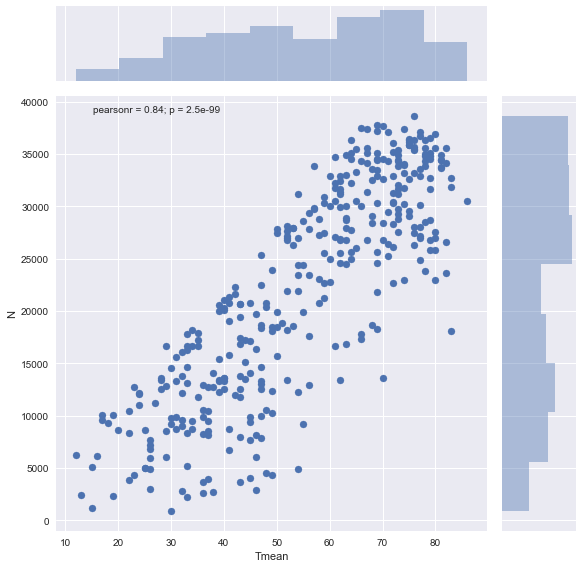

In [12]:
sns.jointplot(df2.Tmean,df.N,size=8);